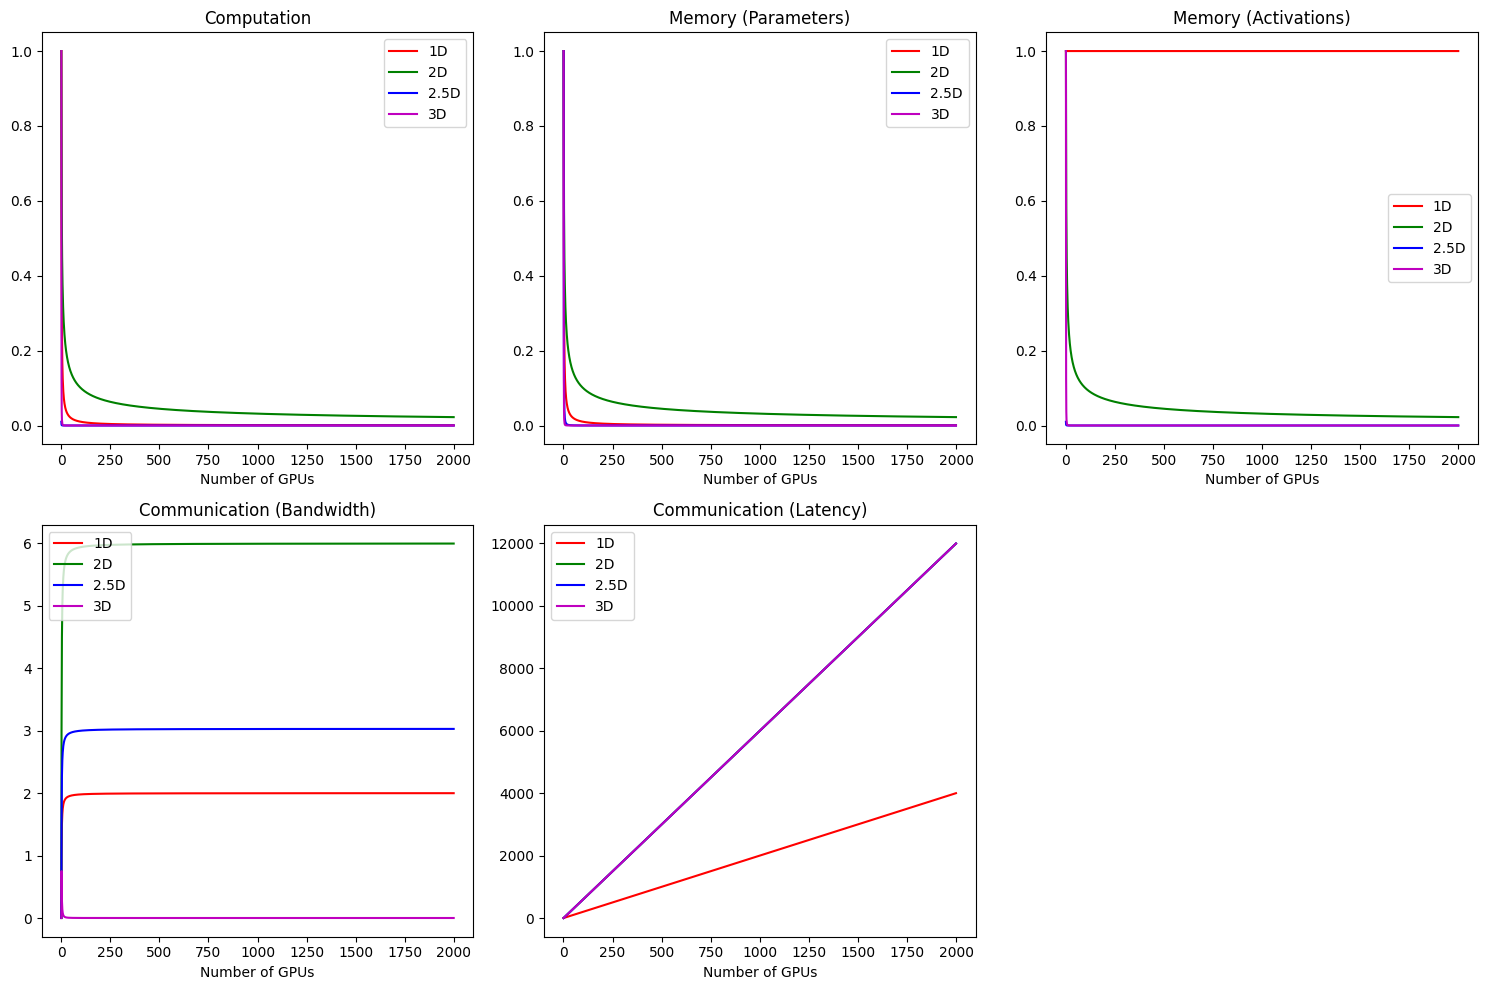

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range of processors (GPUs)
P_values = np.arange(1, 2000)

# 1D tensor parallelism metrics
P_1d = P_values
comp_1d = 1 / P_1d
mem_param_1d = 1 / P_1d
mem_act_1d = np.ones_like(P_1d)
comm_band_1d = (2 * (P_1d - 1)) / P_1d
comm_lat_1d = 2 * (P_1d - 1)

# 2D tensor parallelism metrics
q_2d = np.sqrt(P_values)
comp_2d = 1 / (q_2d)
mem_param_2d = 1 / (q_2d)
mem_act_2d = 1 / (q_2d)
comm_band_2d = 6 * (P_values - 1) / P_values
comm_lat_2d = 6 * (P_values - 1)

# 2.5D tensor parallelism metrics
# q_25d = np.cbrt(P_values)
# d_25d = np.cbrt(P_values)
d = 100
comp_25d = 1 / (d * (P_values ** 2))
mem_param_25d = 1 / (P_values ** 2)
mem_act_25d = 1 / (d * (P_values ** 2))
comm_band_25d = 3 * (P_values - 1) * (d + 1) / (d * P_values)
comm_lat_25d = 6 * (P_values - 1)

# 3D tensor parallelism metrics
# q_3d = np.cbrt(P_values)
comp_3d = 1 / (P_values**3)
mem_param_3d = 1 / (P_values ** 3)
mem_act_3d = 1 / (P_values ** 3)
comm_band_3d = (6 * (P_values - 1)) / (P_values ** 3)
comm_lat_3d = 6 * (P_values - 1)

# Plotting
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
metrics = ['Computation', 'Memory (Parameters)', 'Memory (Activations)', 'Communication (Bandwidth)', 'Communication (Latency)']
data = [(comp_1d, comp_2d, comp_25d, comp_3d), 
        (mem_param_1d, mem_param_2d, mem_param_25d, mem_param_3d),
        (mem_act_1d, mem_act_2d, mem_act_25d, mem_act_3d),
        (comm_band_1d, comm_band_2d, comm_band_25d, comm_band_3d),
        (comm_lat_1d, comm_lat_2d, comm_lat_25d, comm_lat_3d)]

for i, ax in enumerate(axs.flatten()):
    if i < len(metrics):
        metric = metrics[i]
        comp_1d_m, comp_2d_m, comp_25d_m, comp_3d_m = data[i]
        ax.plot(P_values, comp_1d_m, label='1D', color='r')
        ax.plot(P_values, comp_2d_m, label='2D', color='g')
        ax.plot(P_values, comp_25d_m, label='2.5D', color='b')
        ax.plot(P_values, comp_3d_m, label='3D', color='m')
        ax.set_title(metric)
        ax.set_xlabel('Number of GPUs')
        ax.legend()

# Remove unused subplots
for i in range(len(metrics), len(axs.flatten())):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()
